In [2]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

n
2433


In [23]:
df.data = df.lot_frontage

df.data %>% count()

colNames = names(which(sapply(df.data, is.character)))
colNames = c(colNames, "LotFrontage.Log", "LotArea.Log")

df.rsquared = df.data %>% 
    select(colNames) %>% 
    gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
    group_by(attr, attr_val) %>%
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.))) %>%
    mutate(n = df + df.residual) %>%
    arrange(desc(r.squared))


df.rsquared %>% filter(n > 50) %>% head(20) %>% select(-AIC, -BIC)

n
2433


attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
MSZoning,FV,0.8955410,0.8946482,0.1570255,1003.0563,3.153496e-59,2,52.465143,2.884869,117,119
Exterior2nd,CmentBd,0.8471182,0.8457888,0.2291791,637.2150,1.015011e-48,2,7.363244,6.040154,115,117
Functional,Min1,0.8315386,0.8282990,0.1552289,256.6761,9.317601e-22,2,24.990433,1.252993,52,54
Neighborhood,Somerst,0.8250515,0.8239581,0.1900050,754.5549,1.875909e-62,2,40.172389,5.776303,160,162
HouseStyle,SFoyer,0.8144048,0.8114113,0.2027298,272.0604,2.358349e-24,2,12.340287,2.548161,62,64
SaleType,COD,0.8043653,0.8015300,0.1712578,283.6982,3.816108e-26,2,25.555255,2.023718,69,71
Exterior1st,CemntBd,0.8028090,0.8010793,0.2582962,464.1197,5.344129e-42,2,-6.564952,7.605730,114,116
Exterior2nd,HdBoard,0.7873747,0.7866564,0.1970255,1096.1206,1.601188e-101,2,62.237534,11.490434,296,298
MSSubClass,160,0.7722380,0.7702401,0.1228811,386.5224,2.013711e-38,2,79.610289,1.721372,114,116
LotShape,Reg,0.7656413,0.7655054,0.1727158,5635.5120,0.000000e+00,2,583.292403,51.458011,1725,1727


n
162


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8250515,0.8239581,0.190005,754.5549,1.875909e-62,2,40.17239,-74.34478,-65.08199,5.776303,160


term,estimate,std.error,statistic,p.value
(Intercept),-2.5800162,0.24286699,-10.62317,2.771163e-20
LotArea.Log,0.7519384,0.02737391,27.46916,1.875909e-62


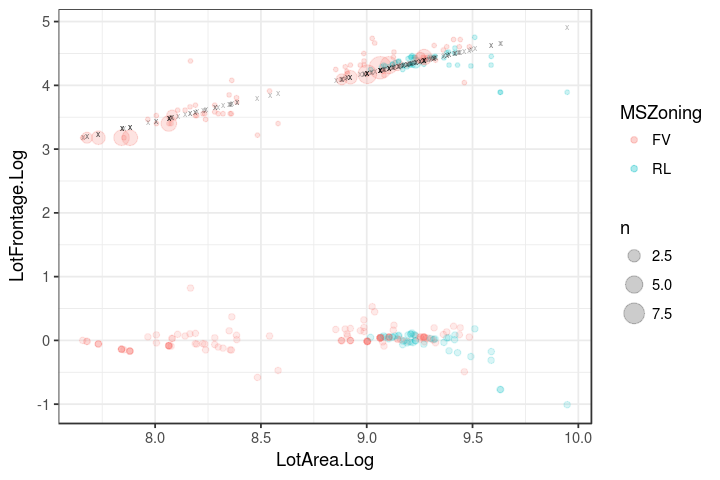

In [24]:
options(repr.plot.width = 6, repr.plot.height = 4)

df = df.lot_frontage %>% filter(Neighborhood == 'Somerst')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = MSZoning), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=MSZoning), alpha=0.15) +
    theme_bw()

n
1614


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.7450488,0.7448906,0.1750336,4710.778,0,2,523.6766,-1041.353,-1025.194,49.38645,1612


term,estimate,std.error,statistic,p.value
(Intercept),-1.3290220,0.079995740,-16.61366,2.456116e-57
LotArea.Log,0.6095045,0.008880361,68.63511,0.000000e+00


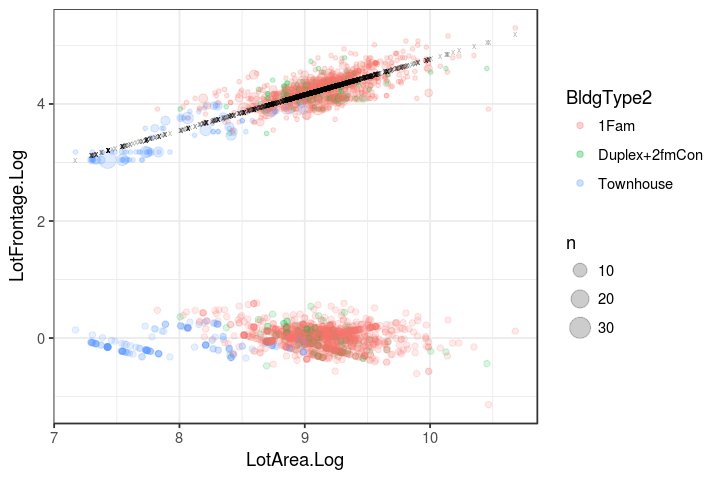

In [25]:
options(repr.plot.width = 6, repr.plot.height = 4)

df = 
    df.lot_frontage %>% 
    filter(Neighborhood != 'Somerst' & LotShape2 == 'Reg')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

ggplot() +
    geom_count(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = BldgType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType2), alpha=0.15) +
    theme_bw()

In [26]:
df.data = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg')
df.data %>% count()

colNames = names(which(sapply(df.data, is.character)))
colNames = c(colNames, "LotFrontage.Log", "LotArea.Log")

df.rsquared = df.data %>% 
    select(colNames) %>% 
    gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
    group_by(attr, attr_val) %>%
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.))) %>%
    mutate(n = df + df.residual) %>%
    arrange(desc(r.squared))


df.rsquared %>% filter(n > 50) %>% head(20) %>% select(-AIC, -BIC)

n
657


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
MasVnrType,Stone,0.5714128,0.5669483,0.2525811,127.99173,2.321765e-19,2,-3.195371,6.124530,96,98
Neighborhood,NridgHt,0.5631450,0.5576152,0.2353125,101.83804,7.340045e-16,2,3.272629,4.374387,79,81
LotConfig,Corner,0.4233094,0.4185434,0.2039118,88.81790,3.790331e-16,2,22.057113,5.031183,121,123
LotConfig2,Corner,0.4233094,0.4185434,0.2039118,88.81790,3.790331e-16,2,22.057113,5.031183,121,123
Exterior2nd,HdBoard,0.3784050,0.3697717,0.2937094,43.83105,5.494002e-09,2,-13.325530,6.211097,72,74
LandContour,HLS,0.3577075,0.3494730,0.3153639,43.43999,4.677927e-09,2,-20.180136,7.757445,78,80
HeatingQC,Gd,0.3377199,0.3294414,0.2578617,40.79481,1.038930e-08,2,-4.203357,5.319414,80,82
Exterior1st,HdBoard,0.3316309,0.3239485,0.2964314,43.16761,3.543830e-09,2,-17.055511,7.644827,87,89
Neighborhood,NAmes,0.3296746,0.3195181,0.2957408,32.45964,3.067257e-07,2,-12.630320,5.772531,66,68
OverallQual,8,0.3152340,0.3099666,0.3230782,59.84587,2.501385e-12,2,-37.150593,13.569337,130,132


n
123


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.4233094,0.4185434,0.2039118,88.8179,3.790331e-16,2,22.05711,-38.11423,-29.67767,5.031183,121


term,estimate,std.error,statistic,p.value
(Intercept),-0.4245613,0.52604986,-0.8070743,4.212073e-01
LotArea.Log,0.5300931,0.05624733,9.4243247,3.790331e-16


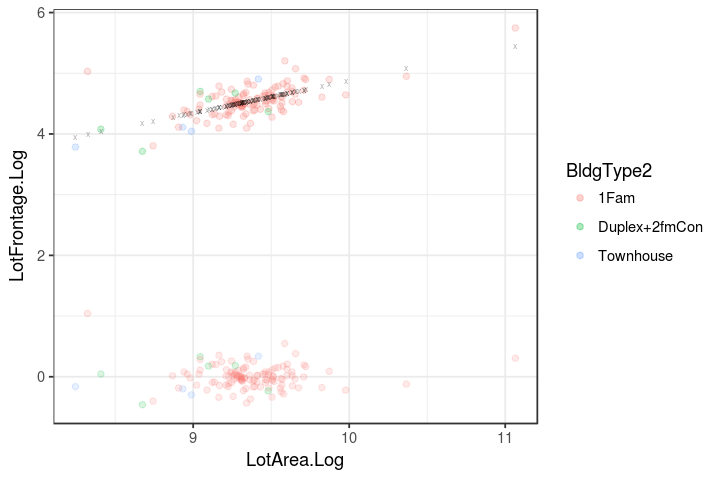

In [29]:
options(repr.plot.width = 6, repr.plot.height = 4)

df = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Corner')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = BldgType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType2), alpha=0.15) +
    theme_bw()

In [31]:
df.data = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 != 'Corner')
df.data %>% count()

colNames = names(which(sapply(df.data, is.character)))
colNames = c(colNames, "LotFrontage.Log", "LotArea.Log")

df.rsquared = df.data %>% 
    select(colNames) %>% 
    gather(attr, attr_val, -LotFrontage.Log, -LotArea.Log) %>% 
    group_by(attr, attr_val) %>%
    do(glance(lm(LotFrontage.Log ~ LotArea.Log, data=.))) %>%
    mutate(n = df + df.residual) %>%
    arrange(desc(r.squared))


df.rsquared %>% filter(n > 50) %>% head(20) %>% select(-AIC, -BIC)

n
534


Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”Warning message in stats::summary.lm(x):
“essentially perfect fit: summary may be unreliable”

attr,attr_val,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,deviance,df.residual,n
Neighborhood,NridgHt,0.5067054,0.4984838,0.2468010,61.63117,8.816359e-11,2,-0.2089909,3.654645,60,62
MasVnrType,Stone,0.4609117,0.4537239,0.2565891,64.12379,1.153529e-11,2,-3.5035466,4.937848,75,77
Exterior2nd,HdBoard,0.3869363,0.3765454,0.2929469,37.23796,8.742202e-08,2,-10.6448985,5.063257,59,61
Exterior1st,HdBoard,0.3480925,0.3387795,0.2983166,37.37720,4.929945e-08,2,-14.0582302,6.229496,70,72
HeatingQC,Gd,0.3387824,0.3289135,0.2486172,34.32821,1.557116e-07,2,-0.8549445,4.141303,67,69
Neighborhood,NAmes,0.3283128,0.3148790,0.3119681,24.43941,9.028263e-06,2,-12.1926361,4.866204,50,52
LotConfig,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.0205519,25.827281,431,433
LotConfig2,Inside,0.3043203,0.3027062,0.2447940,188.53800,7.581044e-36,2,-4.0205519,25.827281,431,433
LandContour,HLS,0.3022949,0.2915610,0.3268595,28.16257,1.442296e-06,2,-19.1325769,6.944412,65,67
OverallQual,8,0.2696152,0.2627892,0.3358424,39.49812,7.255623e-09,2,-34.7236497,12.068539,107,109


n
433


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.3043203,0.3027062,0.244794,188.538,7.581044e-36,2,-4.020552,14.0411,26.25332,25.82728,431


term,estimate,std.error,statistic,p.value
(Intercept),0.7430773,0.2562748,2.899533,3.928211e-03
LotArea.Log,0.3808421,0.0277361,13.730914,7.581044e-36


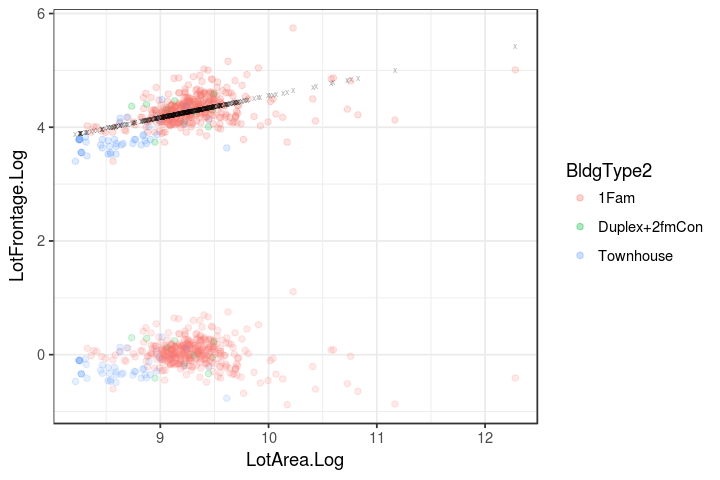

In [32]:
options(repr.plot.width = 6, repr.plot.height = 4)

df = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' & LotConfig2 == 'Inside')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = BldgType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType2), alpha=0.15) +
    theme_bw()

n
101


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.08690393,0.07768073,0.3723469,9.422326,0.002766346,2,-42.5219,91.04381,98.88917,13.72558,99


term,estimate,std.error,statistic,p.value
(Intercept),1.5822263,0.7898063,2.003309,0.047877393
LotArea.Log,0.2555048,0.0832377,3.069581,0.002766346


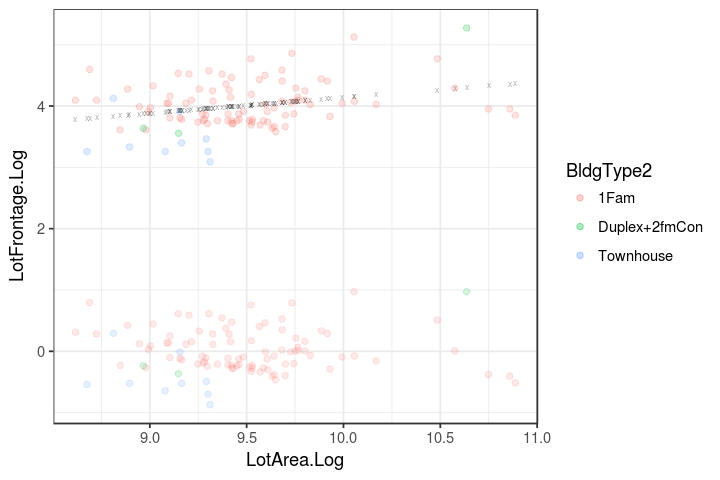

In [34]:
options(repr.plot.width = 6, repr.plot.height = 4)

df = df.lot_frontage %>% filter(Neighborhood != 'Somerst' & LotShape2 != 'Reg' 
                                & LotConfig2 != 'Corner' & LotConfig2 != 'Inside')

model = df %>% 
    do(mod = lm(LotFrontage.Log ~ LotArea.Log, data=.))

fitted = df %>% 
    do(augment(lm(LotFrontage.Log ~ LotArea.Log, data=.), data = .))

df %>% count()
model %>% glance(mod)
model %>% tidy(mod)

ggplot() +
    geom_point(data=fitted, aes(x=LotArea.Log, y=LotFrontage.Log, colour = BldgType2), alpha=0.2) +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.fitted), alpha=0.3, color="black", shape='x') +
    geom_point(data=fitted, aes(x=LotArea.Log, y=.resid, colour=BldgType2), alpha=0.15) +
    theme_bw()